In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import PIL.ExifTags

<b> № 1 </b>

In [17]:
img_path = 'GOPR01170000.jpg'
img = Image.open(img_path)

In [23]:
exif_data = { PIL.ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in PIL.ExifTags.TAGS }

In [24]:
exif_data

{'ColorSpace': 1,
 'ExifImageWidth': 960,
 'ExifImageHeight': 540,
 'ResolutionUnit': 2,
 'ExifOffset': 172,
 'Software': 'Adobe Photoshop CC 2019 (Macintosh)',
 'Orientation': 1,
 'DateTime': '2019:01:20 17:55:55',
 'XResolution': 72.0,
 'YResolution': 72.0}

In [28]:
cx = exif_data.get('ExifImageWidth') / 2
cy = exif_data.get('ExifImageHeight') / 2

print(f"Cx: {cx} ; Cy: {cy}")

Cx: 480.0 ; Cy: 270.0


In [33]:
dpi_x, dpi_y = exif_data.get('XResolution'), exif_data.get('YResolution')
print(f"DPI X: {dpi_x} ; DPI Y: {dpi_y}")

DPI X: 72.0 ; DPI Y: 72.0


In [34]:
dpi_to_mm = lambda x: x * 25.4
dpi_x_mm, dpi_y_mm = dpi_to_mm(dpi_x), dpi_to_mm(dpi_y)
print(f"IN MM DPI X: {dpi_x_mm} ; DPI Y: {dpi_y_mm}")

IN MM DPI X: 1828.8 ; DPI Y: 1828.8


In [36]:
focal_length = 24.0
focal_x = focal_length * dpi_x_mm
focal_y = focal_length * dpi_y_mm
print(f"Focal x: {focal_x} ; Focal y: {focal_y}")

Focal x: 43891.2 ; Focal y: 43891.2


In [37]:
camera_matrix = np.array([[focal_x, 0, cx], [0, focal_y, cy], [0,0,1]])

In [39]:
print(f"Camera matrix: \n{camera_matrix}")

Camera matrix: 
[[4.38912e+04 0.00000e+00 4.80000e+02]
 [0.00000e+00 4.38912e+04 2.70000e+02]
 [0.00000e+00 0.00000e+00 1.00000e+00]]


<b> № 2 </b>

In [42]:
camera_data = cv2.FileStorage("camera.xml", cv2.FILE_STORAGE_READ)

In [48]:
camera_matrix= camera_data.getNode('camera_matrix').mat()
dist_coefs = camera_data.getNode('distortion_coefficients').mat()

print(f"Camera matrix : \n{camera_matrix}")
print()
print(f"Distorsion coefficients: \n{dist_coefs}")

Camera matrix : 
[[425.81151398   0.         481.75802556]
 [  0.         435.33255746 267.43704186]
 [  0.           0.           1.        ]]

Distorsion coefficients: 
[[ 4.44290018e+00]
 [ 2.76490305e+00]
 [-4.52039013e-03]
 [-1.82178053e-03]
 [ 0.00000000e+00]
 [ 4.70565765e+00]
 [ 3.93432913e+00]
 [ 3.39107454e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


In [49]:
w, h = exif_data.get('ExifImageWidth'), exif_data.get('ExifImageHeight')

In [52]:
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))

In [56]:
img = cv2.imread(img_path)
undistorted_img = cv2.undistort(img, camera_matrix, dist_coefs, None, new_camera_matrix)

Original: 



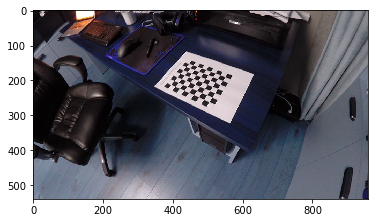

In [59]:
print("Original: \n")
plt.imshow(img)

Undistorted: 



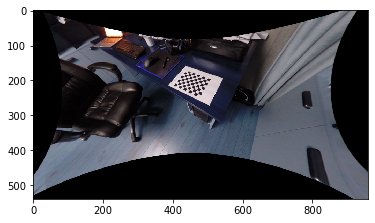

In [60]:
print("Undistorted: \n")
plt.imshow(undistorted_img)

In [61]:
plt.imsave("undistorted" + img_path, undistorted_img)